In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# import the cleaned dataset
movies_db = pd.read_csv('Movies_DB_clean.csv',index_col=0)
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male


In [3]:
# adding a new column changing the vote counts to thousands
movies_db['Votes (Thousands)'] = movies_db['Votes'] / 1000
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Votes (Thousands)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,757.074
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,485.820
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,157.606
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,60.545
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,393.727


# General insights on the dataset

## Revenue

In [4]:
# general overview of the revenue data
revenue_stats = movies_db['Revenue (Millions)'].describe()
revenue_stats.head(10)

count    756.000000
mean      94.058519
std      106.309789
min        0.010000
25%       25.022500
50%       58.315000
75%      127.407500
max      936.630000
Name: Revenue (Millions), dtype: float64

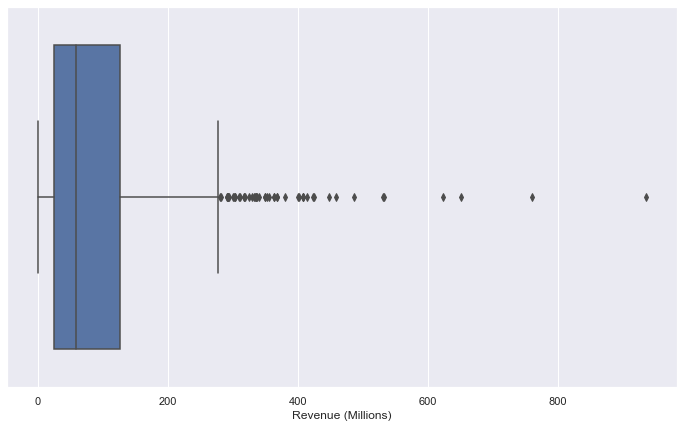

In [5]:
# creating some plot to visualize the distribution
sns.set(style= 'darkgrid')

f, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(x= movies_db['Revenue (Millions)'])

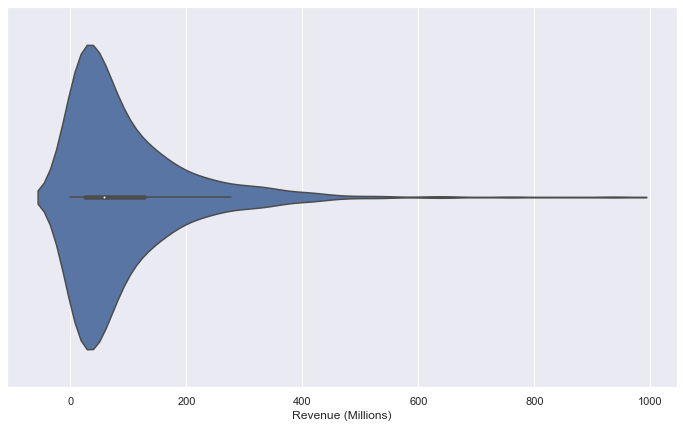

In [6]:
f, ax = plt.subplots(figsize=(12,7))
sns.violinplot("Revenue (Millions)", data = movies_db)
plt.show()

In [7]:
'''
Because of the data dispersion, I decided to bin the revenue data based on the
statistics summary. The bins are as follows:
# up to 25% percentile = low revenue
# 25% to 75% percentile = average revenue
# 75% to mean + 3std = high revenue
# outliers = top revenue
'''

rev_bins = ['low','average','high','top']

rev_binned = pd.cut(movies_db['Revenue (Millions)'], [0,revenue_stats[4],revenue_stats[6],(revenue_stats[1] + 3 * revenue_stats[2]),revenue_stats[7]],labels = rev_bins)

In [8]:
# add revenue classification column to dataframe
movies_db['Revenue_Classification'] = rev_binned

In [9]:
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Votes (Thousands),Revenue_Classification
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,757.074,high
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,485.820,average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,157.606,high
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,60.545,high
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,393.727,high


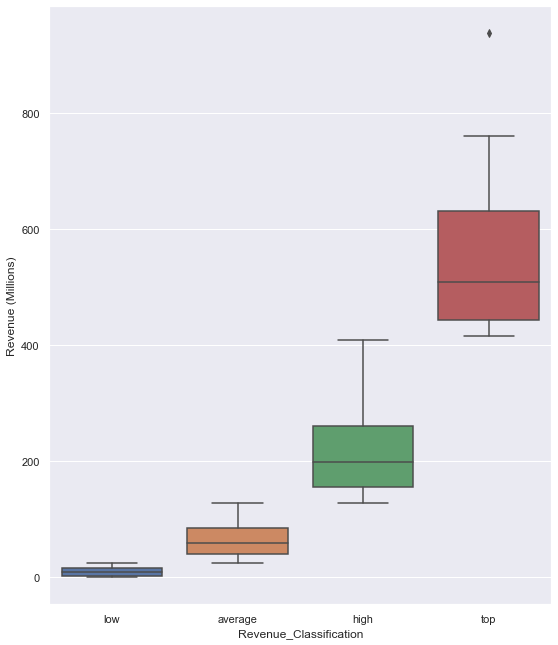

In [10]:
# visualizing the binned revenue data
sns.set(style= 'darkgrid')
f, ax = plt.subplots(figsize=(9,11))
ax = sns.boxplot(x= movies_db['Revenue_Classification'], y= movies_db['Revenue (Millions)'])

## Top 25 highest-grossing movies

In [11]:
# creating a df sorted by the revenue
top25_revenue_movie = movies_db.sort_values(by = ['Revenue (Millions)'], ascending = False)
top25_revenue_movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Votes (Thousands),Revenue_Classification
37,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,J.J.,Abrams,male,661.608,top
68,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,James,Cameron,male,935.408,top
67,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,Colin,Trevorrow,male,455.169,top
58,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Joss,Whedon,male,1045.588,top
40,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Christopher,Nolan,male,1791.916,top


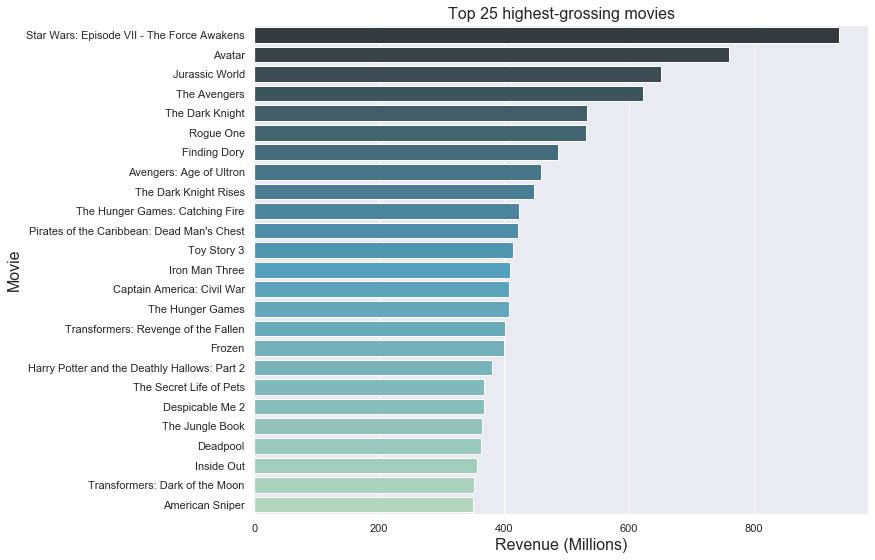

In [12]:
# ploting the top 25
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(11,9))

ax = sns.barplot(x= 'Revenue (Millions)', y= 'Title', data= top25_revenue_movie[:25], palette= 'GnBu_d')
plt.title("Top 25 highest-grossing movies",fontsize =16)
plt.xlabel("Revenue (Millions)",fontsize =16)
plt.ylabel("Movie",fontsize =16)
#plt.rcParams["axes.labelsize"] = 10
#plt.xticks(rotation = 90)
sns.set(font_scale=1)

plt.show()

## Movies per director genre

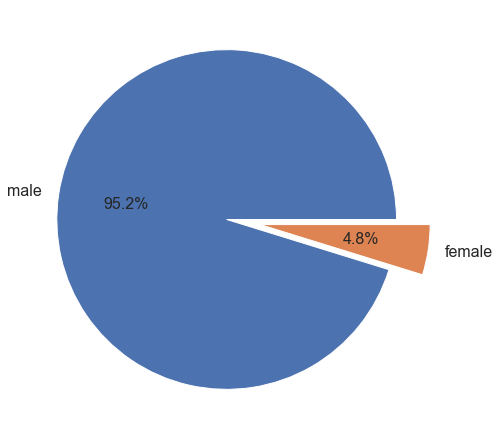

In [13]:
# visualizing percentage of movies per director genre
labels = movies_db['Director_genre'].value_counts().index
sizes = (movies_db['Director_genre'].value_counts().values/len(movies_db['Director_genre']))*100

fig1,ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode = (0,0.2),labels = labels,autopct='%1.1f%%',textprops={'fontsize': 16})
plt.tight_layout()
plt.show()

# Rating

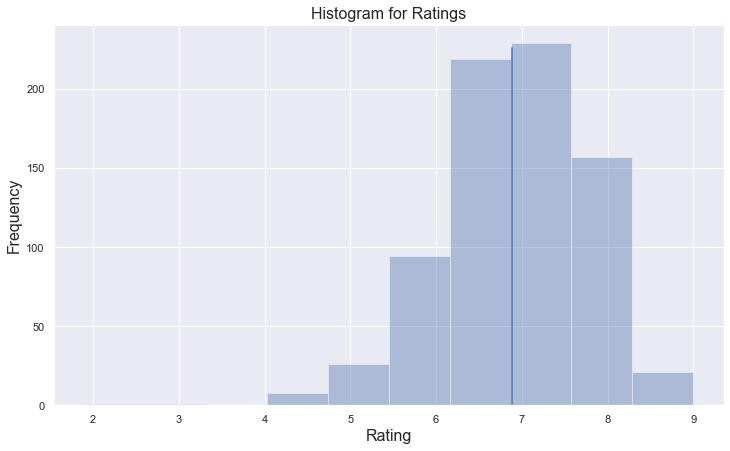

In [15]:
# histogram for ratings
f, ax = plt.subplots(figsize=(12,7))
fig = sns.distplot(movies_db['Rating'], bins=10, kde = False, rug= False)
plt.axvline(6.89,0,0.94) # this is to display the mean
plt.title("Histogram for Ratings",fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.show()

In [16]:
# average rating
rat_mean = movies_db['Rating'].mean()
f'The average rating is {rat_mean}'

'The average rating is 6.893386243386244'

# Votes

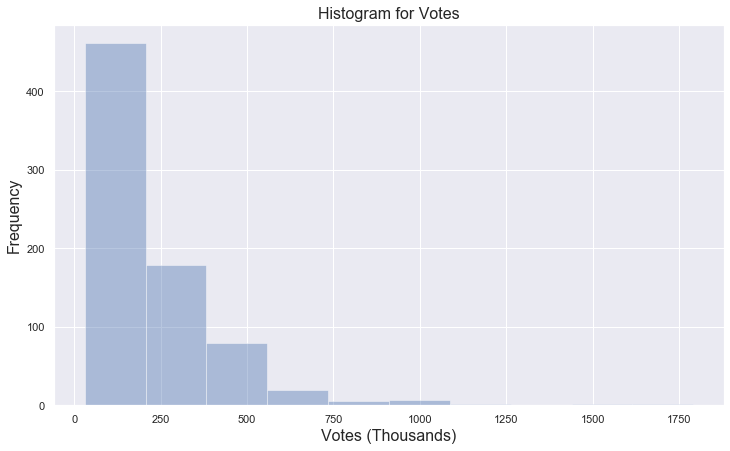

In [21]:
# histogram for votes
f, ax = plt.subplots(figsize=(12,7))
fig = sns.distplot(movies_db['Votes (Thousands)'], bins = 10, kde = False, rug= False)
plt.title("Histogram for Votes",fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Votes (Thousands)', fontsize = 16)
plt.show()

## Rating and votes over the years

In [27]:
# no. of movies over the years
movies_years = movies_db.groupby('Year').agg('count')['Rank']
movies_years.head()

Year
2006    42
2007    48
2008    51
2009    47
2010    57
Name: Rank, dtype: int64

In [28]:
# rating over the years
rating_years = movies_db.groupby('Year').agg({'Rating':'mean'})
rating_years.head()

,Rating
Year,
2006,7.130952
2007,7.175000
2008,6.778431
2009,6.929787
2010,6.894737


In [29]:
# votes over the years
votes_years = movies_db.groupby('Year').agg({'Votes (Thousands)':'mean'})
votes_years.head()

,Votes (Thousands)
Year,
2006,275.016024
2007,260.963542
2008,279.656765
2009,265.747277
2010,261.082930


In [30]:
# merge rating and year
over_years_merged = pd.merge(votes_years,rating_years, on = 'Year')
over_years_merged.head()

,Votes (Thousands),Rating
Year,,
2006,275.016024,7.130952
2007,260.963542,7.175000
2008,279.656765,6.778431
2009,265.747277,6.929787
2010,261.082930,6.894737


In [31]:
# add with no. of movies
over_years_merged['no. of movies'] = movies_years
over_years_merged.head()

,Votes (Thousands),Rating,no. of movies
Year,,,
2006,275.016024,7.130952,42
2007,260.963542,7.175000,48
2008,279.656765,6.778431,51
2009,265.747277,6.929787,47
2010,261.082930,6.894737,57


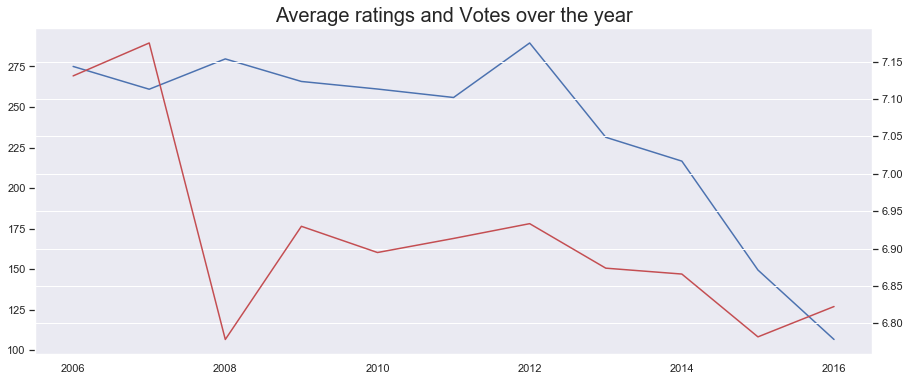

In [32]:
# ploting the time series
sns.set()
f,ax = plt.subplots(figsize=(15,6))
ax = sns.lineplot(data = over_years_merged['Votes (Thousands)'])
ax2 = ax.twinx()
ax2 = sns.lineplot(data = over_years_merged['Rating'], ax=ax2,color='r')
plt.title("Average ratings and Votes over the year",fontsize =20)
ax.grid(False)
#plt.ylabel("Average Rating",'Average Votes')

plt.show()

## Top Genres

In [ ]:
'''
In my dataset, each movie has 3 movie genre label, so I decided to perform
the analysis based on the first one.
'''

In [33]:
# create movies genre list
movies_genre = movies_db['Genre'].str.split(",").tolist()

# flatten the list
movies_genre_flat = [i for sublist in movies_genre for i in sublist]

# print(movies_genre_flat)

# unique genres list
genre_unique = list(set(movies_genre_flat))

# count how many movies of each gender
count_movies_genre = [movies_genre_flat.count(i) for i in genre_unique]

print(len(genre_unique))
print(len(count_movies_genre))

20
20


In [34]:
# create dataframe

genre_counts = pd.DataFrame()
genre_counts["genre"] = genre_unique
genre_counts["counts"] = count_movies_genre
genre_counts = genre_counts.sort_values(by=['counts'], ascending=False)

genre_counts.head(20)

,genre,counts
13,Drama,356
19,Action,267
17,Adventure,240
5,Comedy,220
7,Thriller,132
2,Crime,119
8,Romance,107
3,Sci-Fi,104
0,Fantasy,88
18,Mystery,85


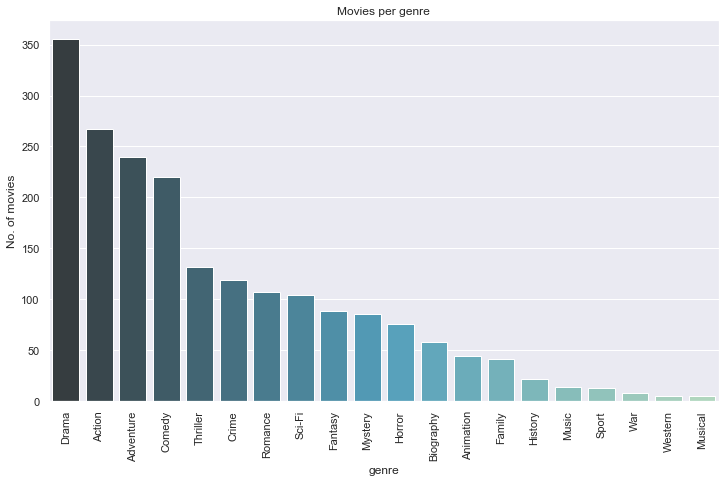

In [35]:
# plot bar char
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='genre', y = 'counts',data = genre_counts, palette="GnBu_d")

plt.title("Movies per genre")
plt.ylabel("No. of movies")
plt.xticks(rotation = 90)

plt.show()

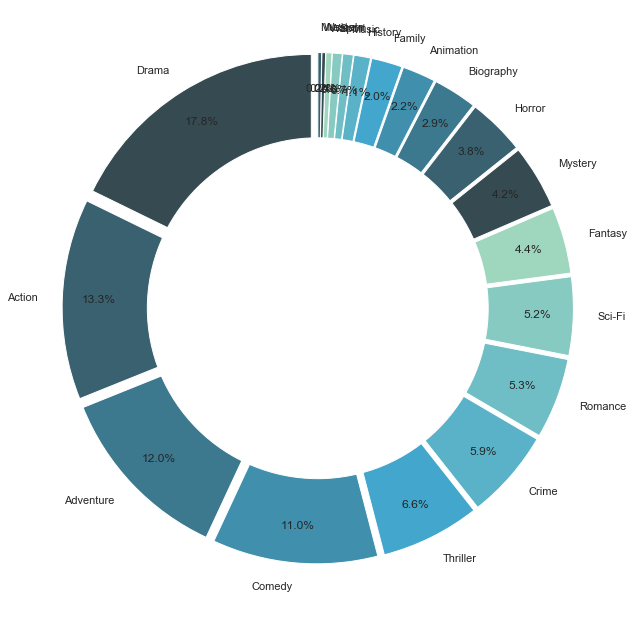

In [36]:
# pie chart
labels = genre_counts['genre']#.value_counts().index
sizes = (genre_counts['counts']/len(genre_counts['counts']))*100 #.value_counts().values

# colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = sns.mpl_palette("GnBu_d",n_colors = 9)

# explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,)

# plot
fig1, ax1 = plt.subplots(figsize=(9,9))

ax1.pie(sizes, colors = colors, labels = labels, autopct ='%1.1f%%',
        startangle = 90, pctdistance = 0.85, explode = explode)

# draw circle
centre_circle = plt.Circle((0,0), 0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [37]:
'''
I want to bin the genres with less than 5% of the movies but I run out of time.
'''

'\nI want to bin the genres with less than 5% of the movies but I run out of time.\n'

## Genre vs Rating

In [39]:
# split the genre labels and create 3 new columns
gender_split = movies_db['Genre'].str.split(",", n = 2, expand = True)
movies_db['Genre_1'] = gender_split[0]
movies_db['Genre_2'] = gender_split[1]
movies_db['Genre_3'] = gender_split[2]
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Votes (Thousands),Revenue_Classification,Genre_1,Genre_2,Genre_3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,757.074,high,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,485.820,average,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,157.606,high,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,60.545,high,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,393.727,high,Action,Adventure,Fantasy


In [40]:
# sorting the df
sort_rating = movies_db.sort_values(by=['Rating'],ascending=False)
sort_rating.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Votes (Thousands),Revenue_Classification,Genre_1,Genre_2,Genre_3
40,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Christopher,Nolan,male,1791.916,top,Action,Crime,Drama
91,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,Nitesh,Tiwari,male,48.969,low,Action,Biography,Drama
62,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Christopher,Nolan,male,1583.625,high,Action,Adventure,Sci-Fi
195,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,Olivier,Nakache,male,557.965,low,Biography,Comedy,Drama
77,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,Makoto,Shinkai,male,34.110,low,Animation,Drama,Fantasy


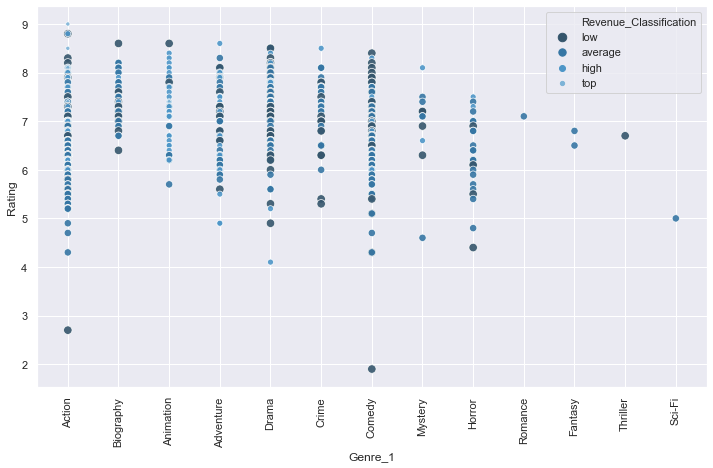

In [41]:
# display scatter plot
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x= 'Genre_1', y= 'Rating', hue = 'Revenue_Classification', size = 'Revenue_Classification', alpha = 0.9, data= sort_rating, palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.show()

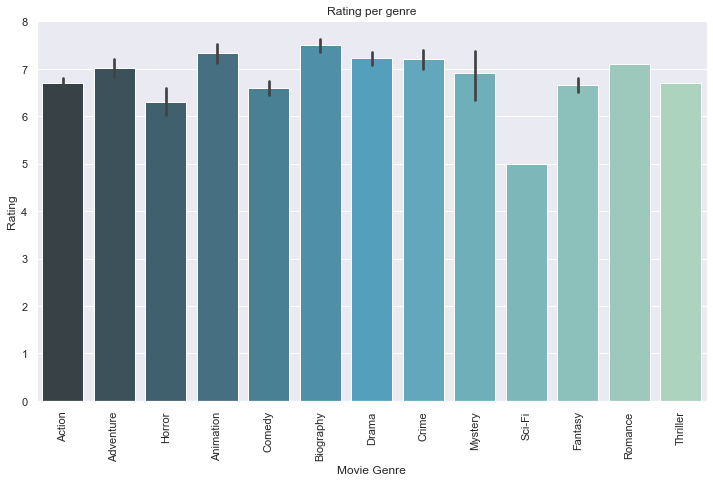

In [42]:
# display bar plot
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='Genre_1', y = 'Rating',data = movies_db, palette="GnBu_d")#, order=list(sort_rating['Rating']))
plt.title("Rating per genre")
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)

plt.show()

## Genre vs Votes

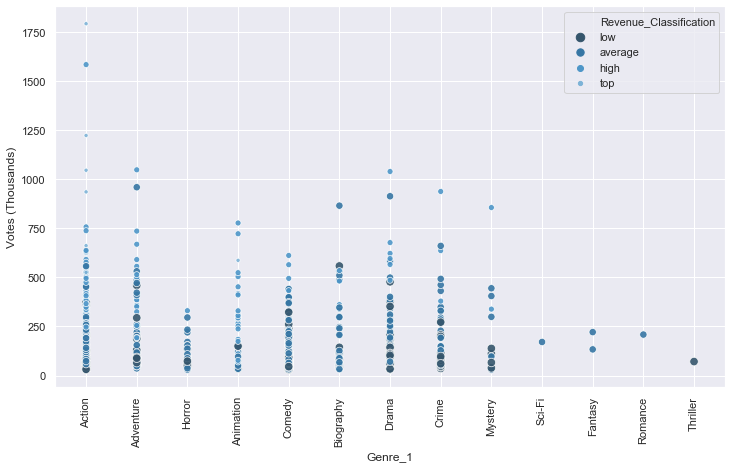

In [43]:
# display scatter plot
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x= 'Genre_1', y= 'Votes (Thousands)', hue = 'Revenue_Classification', size = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.show()

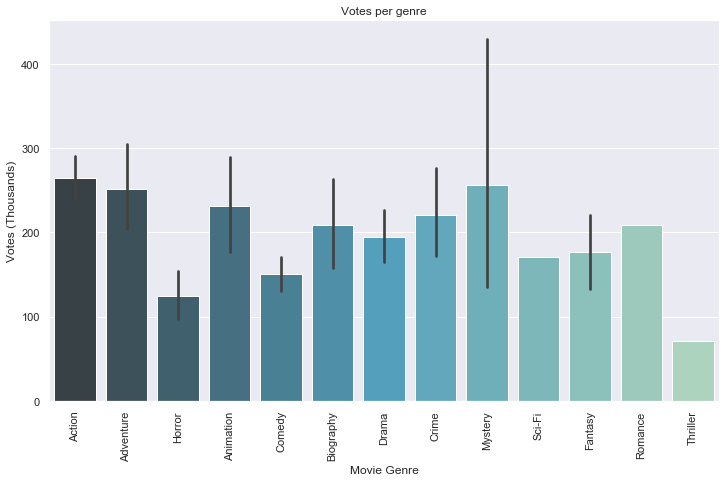

In [44]:
# display the bar plot
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='Genre_1', y = 'Votes (Thousands)',data = movies_db, palette="GnBu_d")#, order=movies_db['Votes'])

plt.title("Votes per genre")
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)

plt.show()

# Answering the Main Questions

## Rating and Revenue

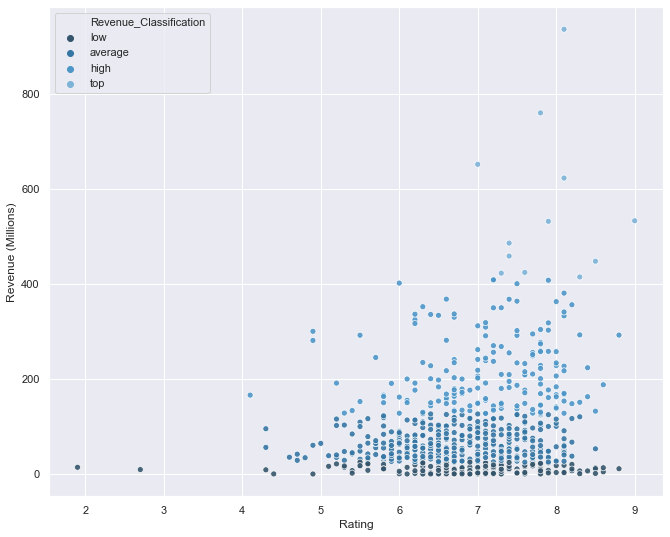

In [17]:
# Rating and Revenue scatter plot 
f, ax = plt.subplots(figsize=(11,9))
ax = sns.scatterplot(x= 'Rating', y= 'Revenue (Millions)', hue = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')

In [18]:
# as we can see, higher rating doesn't mean higher revenue

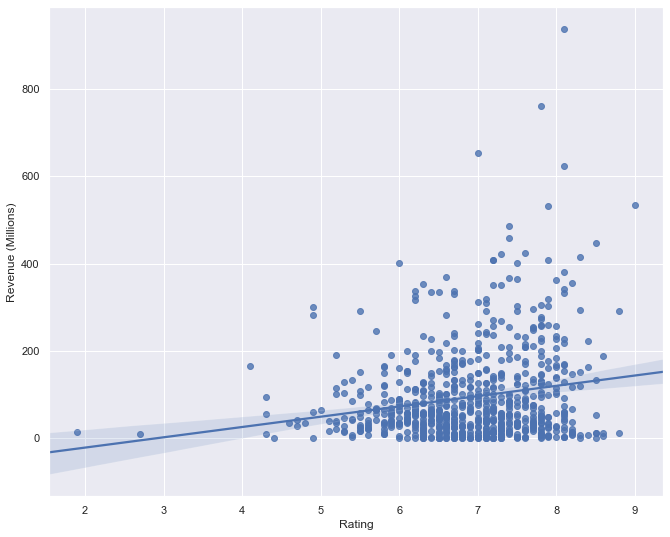

In [19]:
# reg plot
f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Rating', y= 'Revenue (Millions)',  data= movies_db)#, palette = 'Blues_m')

In [20]:
# no correlation

# Rating vs Votes

In [22]:
# creating a df with rating and votes
rating_sorted = movies_db[['Rating','Votes (Thousands)']].sort_values(by=['Rating'])
rating_sorted = rating_sorted.loc[::-1]
rating_sorted = rating_sorted.reset_index()
rating_sorted = rating_sorted.drop('index',axis=1)
rating_sorted.head()

,Rating,Votes (Thousands)
0,9.0,1791.916
1,8.8,48.969
2,8.8,1583.625
3,8.6,34.110
4,8.6,557.965


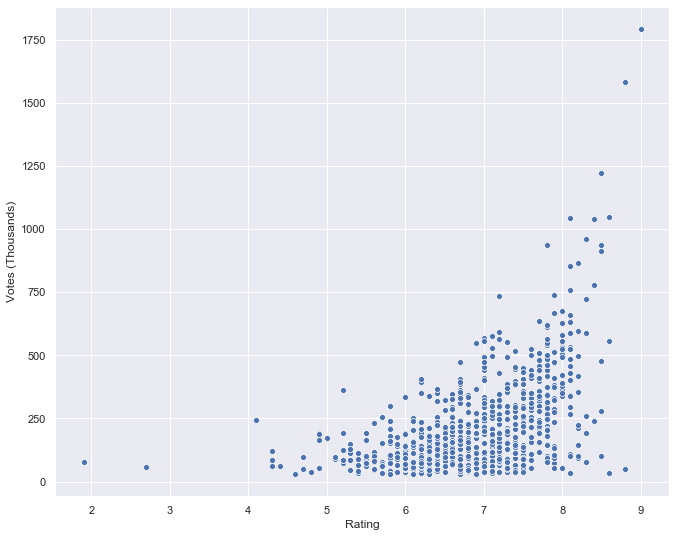

In [24]:
# scatter plot 
f, ax = plt.subplots(figsize=(11,9))
sns.scatterplot(x= 'Rating', y = 'Votes (Thousands)', data = rating_sorted)
plt.show()

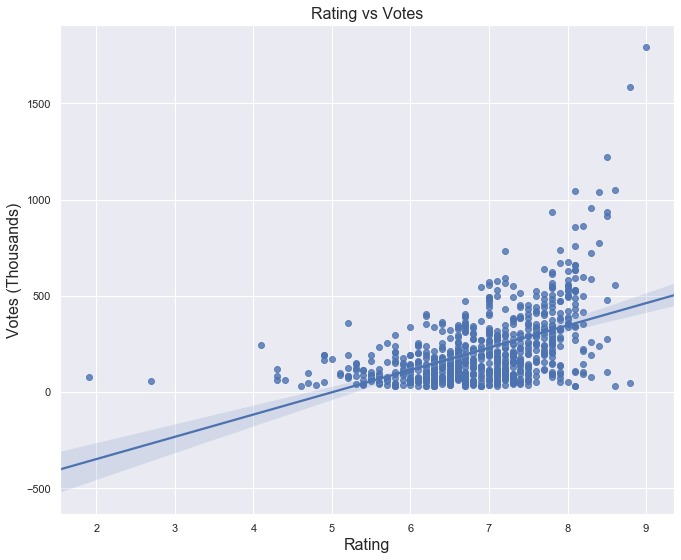

In [45]:
f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Rating', y= 'Votes (Thousands)', data= movies_db)#, palette = 'Blues_m')
plt.title("Rating vs Votes",fontsize=16)
plt.ylabel('Votes (Thousands)', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.show()

In [46]:
'''
After serveral attempts to fit the exponential distribution in this plot, in the
end I gave up because I was running out of time and just kept the linear regression.
'''

'\nAfter serveral attempts to fit the exponential distribution in this plot, in the\nend I gave up because I was running out of time and just kept the linear regression.\n'

# Revenue vs Votes

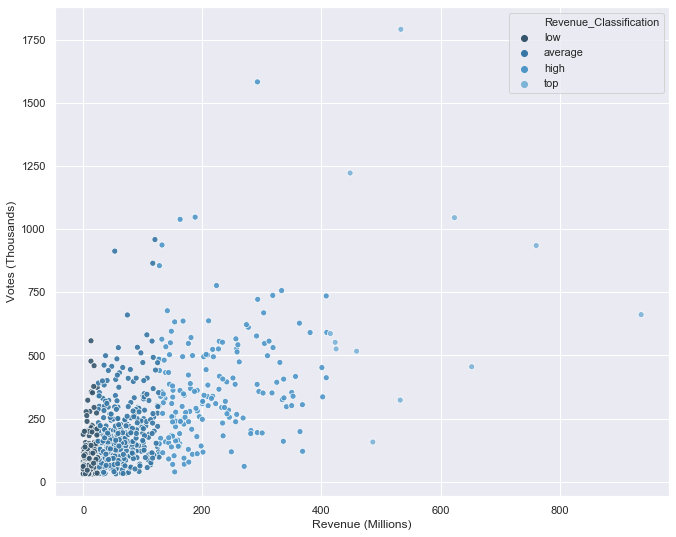

In [25]:
# displaying scatter plot
f, ax = plt.subplots(figsize=(11,9))
sns.scatterplot(x= 'Revenue (Millions)', y= 'Votes (Thousands)', hue = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')

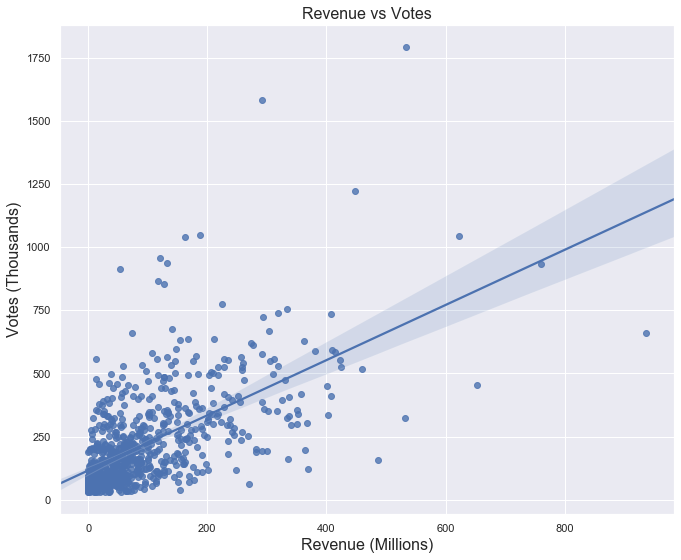

In [26]:
# regplot
f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Revenue (Millions)', y= 'Votes (Thousands)', data= movies_db)#, palette = 'Blues_m')
plt.title("Revenue vs Votes",fontsize=16)
plt.ylabel('Votes (Thousands)', fontsize = 16)
plt.xlabel('Revenue (Millions)', fontsize = 16)
plt.show()